    
# ECON320-3 Assignment 3: James (Minkyu) Song 


## Part I

* Objective: Demonstrate your understanding of the 'Population Regression Function,' and the Orindary Least Squares Estimates.*

* Reference: Wooldridge (7th edition), Chapter 2, Section 2&3*

Following the DGP from Assignment 2, take a sample of 1000 observations from the population data. Manually calculate $\beta_0$ and $\beta_1$ using the functions sum() and var() in NumPy / Python.


In [1]:
# Script name: james_song_assignment_03.ipynb
# Purpose of script: Assignment 3 of ECON320 with Dr.O'Connell
# Author: James (Minkyu) Song
# Date Created: September 11th 2022
# --------------------------
# Notes: NA
# ---------------------------

In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
## DGP from Assignment 2 copied and pasted.

birthday = "04021998"
rngen = np.random.RandomState(int(birthday))
# function that finds the variance using my birthday,
# note that "scale" parameter in rng.normal is standard deviation
# so we have to square root the result to use it in rng.normal, since I return the Variance.

def birthday_str_variance(birthday_string):
    for b in birthday_string:
        if b != "0":
            return int(b)**2

def generate_srm_birhtday(birthday_string, rng):
    #beta0 is addition of 3rd and 4th digit of my birthday
    beta0 = int(birthday_string[2]) +int(birthday_string[3])
    #beta1 is addition of 1st and 2nd digit of my birthday
    beta1= int(birthday_string[0]) + int(birthday_string[1])
    #set scale, scale should be std, so sqrt the result
    scale_set = birthday_str_variance(birthday_string)
    scale_set = math.sqrt(scale_set)
    x = rng.normal(loc = 10, scale= scale_set, size = 1000000)
    u = rng.normal(loc = 0, scale=scale_set, size = 1000000)
    y= beta0+ beta1*x+u
    gdata = {"x": x, "u":u, "y":y}
    df = pd.DataFrame(data= gdata)

    print(f"the generated beta0 is: {beta0}")
    print(f"the generated beta1 is: {beta1}")
    return df

df = generate_srm_birhtday(birthday, rngen)
df.describe()

the generated beta0 is: 2
the generated beta1 is: 4


,x,u,y
count,1000000.000000,1000000.000000,1000000.000000
mean,10.006035,0.005290,42.029428
std,3.998586,3.997323,16.483641
min,-9.133104,-19.658980,-36.515114
25%,7.299433,-2.687745,30.882054
50%,10.010361,0.012191,42.046275
75%,12.700835,2.702350,53.150884
max,28.420761,19.525191,116.744401


In [4]:
sample_df = df.sample(n=1000, replace=False, random_state=rngen)

In [5]:
# covariance function copied and pasted from assignment 
def sample_covariance(np_arr_1, np_arr_2):
    # basic check of manual data entry process
    # first condition is two arrays must be same length, (Xi,Yi) pairs
    if len(np_arr_1) != len(np_arr_2):
        raise ValueError("Two arrays must be the same length")
    # calculating the parameters for the covariance function from assignment_2
    md_1 = np_arr_1 - np_arr_1.mean()
    md_2 = np_arr_2 - np_arr_2.mean()
    m_1x2 = md_1 * md_2
    covariance = m_1x2.sum() / (len(np_arr_1) - 1)
    # verifiyiing with np.cov for accuracy
    if (np.cov(np_arr_1, np_arr_2)[0, 1] - covariance)>0.00001:
        raise ValueError(
            (
                f"the calculated variance ({covariance}) is different from numpy variance ({np.cov(np_arr_1, np_arr_2)[0,1]})"
            )
        )
    return covariance

In [6]:
sample_cov = sample_covariance(sample_df['x'], sample_df['y'])
sample_var = np.var(sample_df['x'], ddof = 1)

b1 = sample_cov / sample_var
x_bar = np.mean(sample_df['x'])
y_bar = np.mean(sample_df['y'])
b0= y_bar -b1 * x_bar
print(f'b0: {b0}\n')
print(f'b1: {b1}\n')

b0: 2.113908571067576

b1: 3.987356706487651



## Part II

* Objective: Understand the useful algebraic properties of OLS estimates and their associated statistics.*

* Reference: Wooldridge (7th edition), Chapter 2, Section 2&3*

Using $\beta_0$ and $\beta_1$ from previous, manually calculate the predicted line and the residuals and plot it in a graph.

In [7]:
sample_df.head()

,x,u,y
681917,8.533378,-0.451305,35.682209
948736,8.113388,2.874649,37.328201
893733,10.578035,-4.134277,40.177865
448409,12.173441,1.365921,52.059685
723825,8.179777,3.345075,38.064185


In [8]:
predicted_line = b0 + b1*sample_df['x'] 
residuals = sample_df['y'] - b0 - b1*sample_df['x']

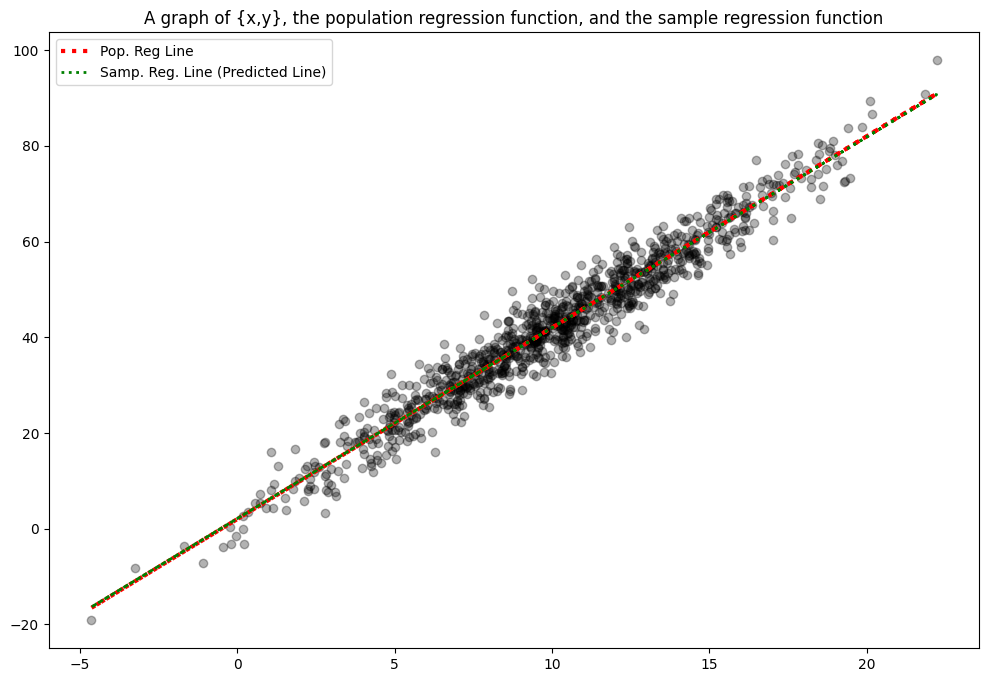

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(sample_df["x"], sample_df["y"] , color = 'k', alpha=0.3)
plt.plot(sample_df["x"], 2+4*sample_df["x"], ':r', linewidth = 3, label="Pop. Reg Line") # beta0 is 2 and beta1 is 4 for the generated data based on my birthday
plt.plot(sample_df["x"], predicted_line, ':g', linewidth=2, label="Samp. Reg. Line (Predicted Line)")
plt.title("A graph of {x,y}, the population regression function, and the sample regression function" )
plt.legend(loc='upper left')
plt.show()